# Decision trees

First: what Scikit-learn can do:

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

clf.predict([[2., 2.]])

array([1])

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [48]:
plt.rcParams['figure.dpi'] = 200

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),

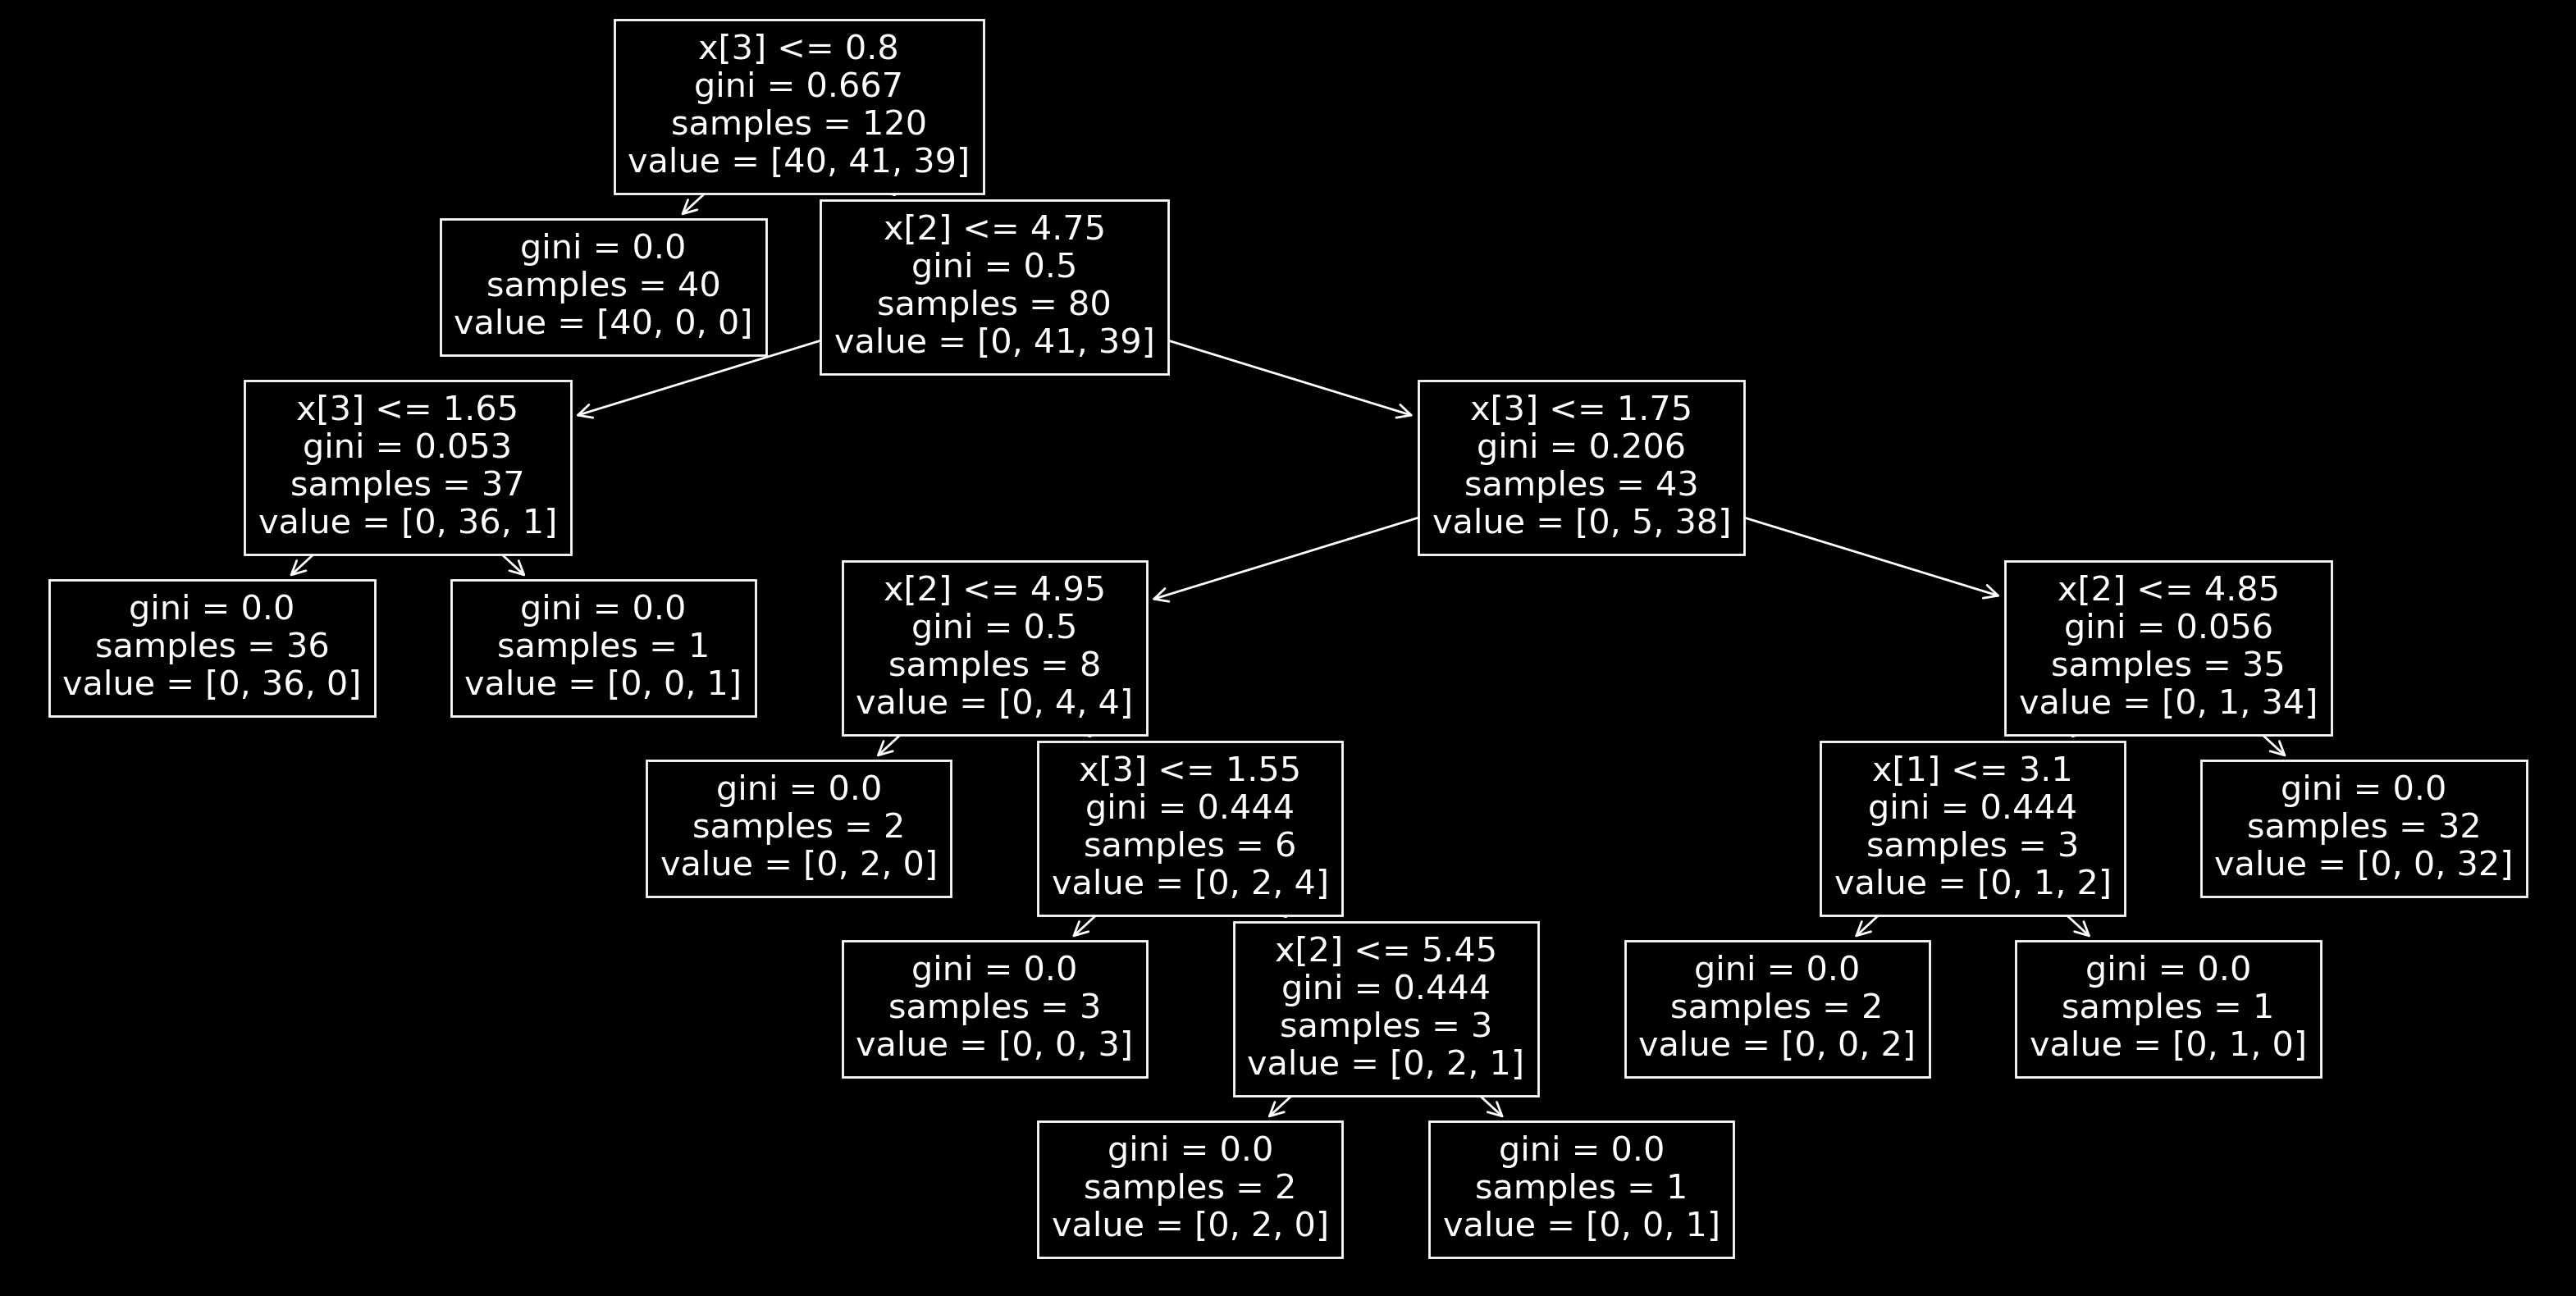

In [49]:
import matplotlib.pyplot as plt
# plt.figure(dpi=200)

tree.plot_tree(clf)

In [22]:
from sklearn.tree import export_text

r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [43]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

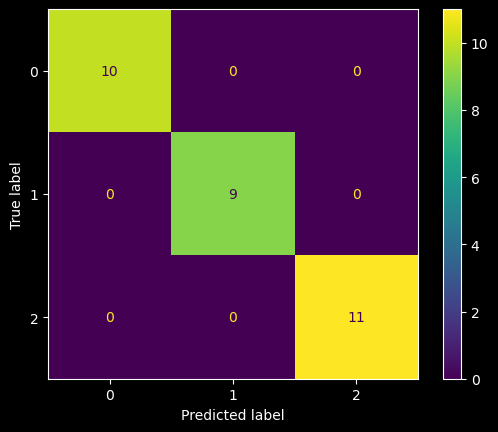

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## An exercise  

Let's use the Breast Cancer Wisconsin (Diagnostic) dataset from scikit-learn for this exercise. 

This dataset is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

They describe characteristics of the cell nuclei present in the image.

Here's a step-by-step guide on how to use this dataset to build a decision tree classifier:

1. **Import necessary libraries**
2. **Load the dataset**
3. **Split the dataset into features and target variable**
4. **Split the dataset into training and testing sets**
5. **Create a Decision Tree Classifier and fit it to the training data**
6. **Make predictions on the testing set**

In [3]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_breast_cancer()

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(
    # max_depth=3,               # start with an initial tree to get a feel for the fit and increase without overfitting
    # min_samples_leaf=5,
    # min_samples_leaf=10,         # more is better
    # max_leaf_nodes=3
    )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

7. **Evaluate the model**

In [4]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[40  3]
 [ 3 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



[Text(0.6145833333333334, 0.9375, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [169, 286]'),
 Text(0.3958333333333333, 0.8125, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [16, 266]'),
 Text(0.2916666666666667, 0.6875, 'x[13] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [5, 258]'),
 Text(0.20833333333333334, 0.5625, 'x[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [3, 257]'),
 Text(0.16666666666666666, 0.4375, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [2, 257]'),
 Text(0.08333333333333333, 0.3125, 'x[1] <= 19.9\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [1, 251]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [0, 237]'),
 Text(0.2916666666666667, 0.1875, 'x[21] <= 33.56\ngini = 0.124\nsamples = 15\nvalue = [

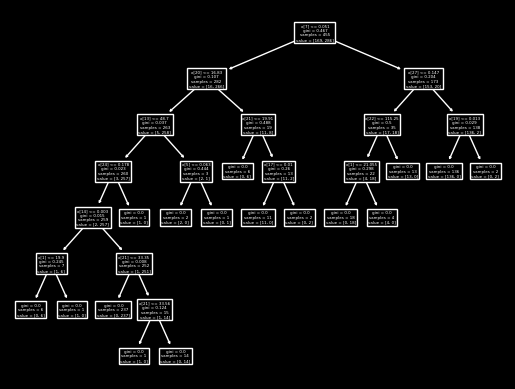

In [5]:
from sklearn import tree

# plt.figure(dpi=400)
tree.plot_tree(clf)

```python
DecisionTreeClassifier(
    *, 
    criterion='gini', 
    splitter='best', 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0)
```

The criterion can be gini, entropy, log_loss. Entropy is how the book does the partitioning. Above we used the default, gini.

**Gini**: This is a measure of impurity or purity used while creating a decision tree in the CART (Classification and Regression Tree) algorithm. It is the name of the cost function used to evaluate splits in the dataset. A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group results in a Gini score of 0.5 (for a 2 class problem).

**Value**: The `value` field in each node tells you how many of the samples that reached that node fall into each target class. For example, a value of `[50, 54]` in a binary classification problem indicates that 50 samples at that node belong to the first class and 54 samples belong to the second class. This is useful for understanding how the tree is making its decisions.

**ccp_alpha** sets the complexity parameter for Minimal Cost-Complexity Pruning. By increasing ccp_alpha, more of the tree is pruned, which increases the number of nodes pruned.

In a decision tree, the goal is to make splits that reduce impurity. The tree will choose the splits that result in the largest decrease in impurity, as measured by the Gini impurity or entropy.

# random forests

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=20)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [7]:
cm = confusion_matrix(y_test, y_pred)

# plt.figure(dpi=10) # doesn't work
ConfusionMatrixDisplay(cm).plot()

NameError: name 'ConfusionMatrixDisplay' is not defined

# With Xgboost

Note how:
- the data is converted to a `DMatrix`
- the `param` stuff gets a bit more complicated, and 
- the predictions are converted (see below)

In [8]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Convert the dataset to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 2}  # the number of classes that exist in this dataset
num_round = 20  # the number of training iterations

# Train the model
bst = xgb.train(param, dtrain, num_round)

# Make predictions
preds = bst.predict(dtest)
predictions = np.asarray([np.argmax(line) for line in preds])

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[17:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

Accuracy: 97.37%


Here's a breakdown of what this line is doing: `np.asarray([np.argmax(line) for line in preds])`

- `preds` is a 2D array where each row corresponds to a sample in the test set and each column corresponds to a class. The values are the predicted probabilities that the sample belongs to each class.

- `np.argmax(line) for line in preds` is a list comprehension that goes through each row in `preds` and finds the index of the maximum value. This index is the predicted class for that sample.

- `np.asarray([np.argmax(line) for line in preds])` converts the list of predicted classes into a numpy array.

So, this line of code is converting the predicted probabilities from the XGBoost model into predicted classes. For example, if the predicted probabilities for a sample are `[0.1, 0.9]`, this means the model predicts there's a 10% chance the sample belongs to class 0 and a 90% chance it belongs to class 1. The `np.argmax` function will return 1, indicating that class 1 is the predicted class for this sample.

In [9]:
# preds
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [10]:
cm = confusion_matrix(y_test, predictions)

# plt.figure(dpi=10) # doesn't work
ConfusionMatrixDisplay(cm).plot()

NameError: name 'ConfusionMatrixDisplay' is not defined

Note that `rcParams` is an attribute of `plt` and a dictionary-like variable that you can use to configure using the `pdi` or `figure.figsize `key.

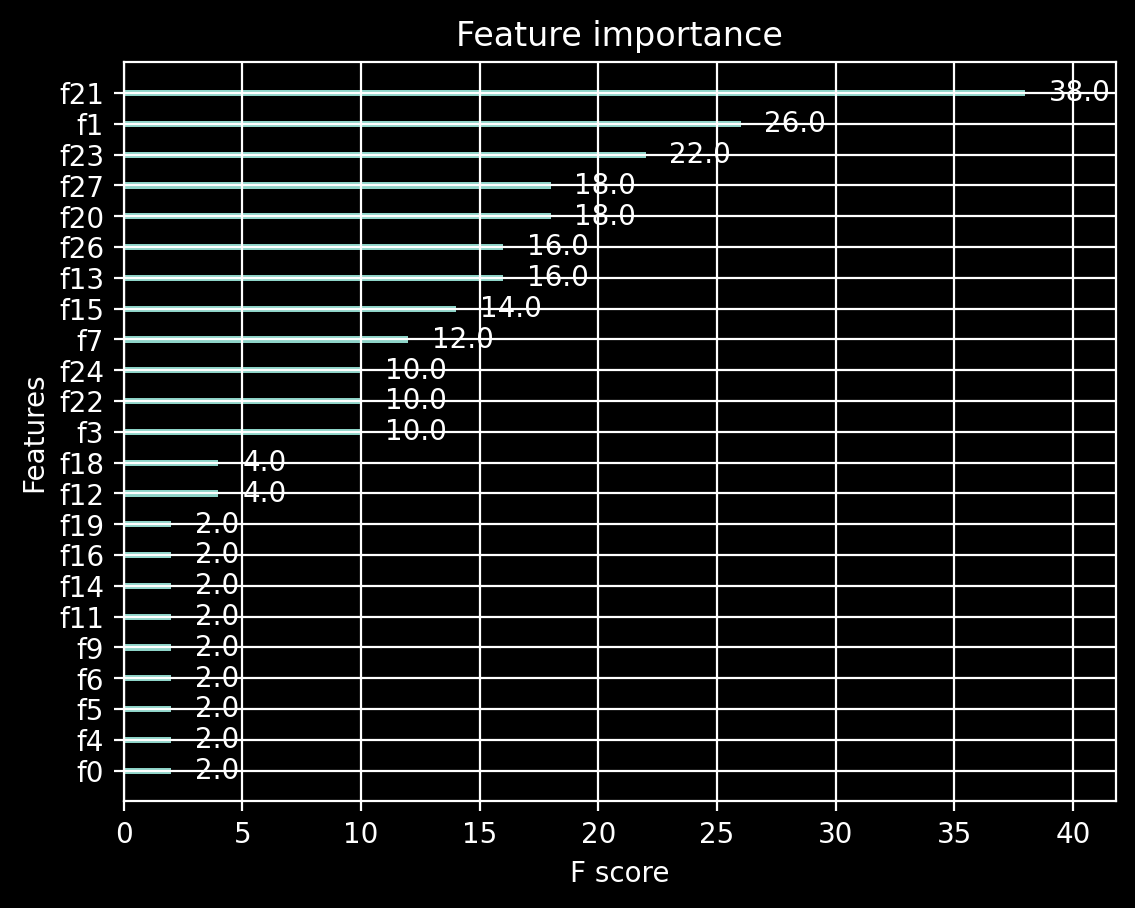

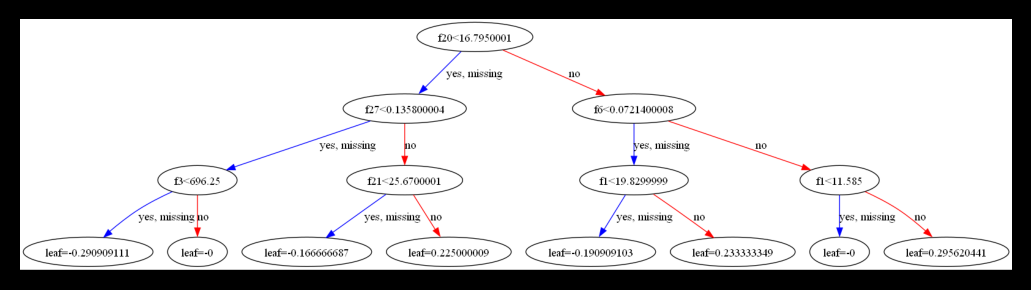

In [25]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from matplotlib import rcParams

plt.rcParams['figure.dpi'] = 200
# plt.figure(dpi=200)

# Plot feature importance
plot_importance(bst)
plt.show()


# Plot the decision tree
plot_tree(bst)
plt.show()
